<a href="https://www.kaggle.com/code/dalao1002/house-prices-regression-prediction?scriptVersionId=134523981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import sys

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
print("Operating system: ", sys.platform)

Operating system:  linux


In [3]:
print("Python version", sys.version)

Python version 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


In [4]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [5]:
print("Pandas version: ", pd.__version__)

Pandas version:  1.3.5


In [6]:
print("Matplotlib version: ", matplotlib.__version__)

Matplotlib version:  3.5.2


In [7]:
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.11.2


In [8]:
print("Sklearn version: ", sklearn.__version__)

Sklearn version:  1.0.2


In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
# Read the input data that are available in the read-only "../input/" directory
train_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
test_X = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

In [11]:
TARGET = "SalePrice"
RANDOM_STATE = 0

In [12]:
# Remove rows with missing target
train_full.dropna(axis=0, subset=[TARGET], inplace=True)

# Separate target from features
X_train_full = train_full.drop([TARGET], axis=1)
y_train_full = train_full[TARGET]

In [13]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    train_size=0.8, test_size=0.2,
    # shuffle the dataset to ensure the traning set is representive of the overall distribution of the data,
    # this would be useful e.g. the input is sorted by target label or specific feature.
    shuffle=True,
    random_state=RANDOM_STATE
)

In [14]:
# Display Descriptive Statistics
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1110.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,45.571918,568.049658,1053.511986,1160.958904,351.479452,6.444349,1518.882705,0.422089,0.054795,1.566781,0.384418,2.882705,1.044521,6.544521,0.612158,1978.140541,1.771404,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349
std,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,156.229962,437.569919,412.073393,373.315037,438.137938,51.200836,513.800708,0.514494,0.231409,0.546698,0.497118,0.802166,0.218441,1.624493,0.640872,24.877265,0.730041,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,228.000000,798.750000,884.000000,0.000000,0.000000,1139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,482.500000,992.000000,1092.000000,0.000000,0.000000,1471.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,0.000000,811.250000,1276.250000,1389.250000,729.000000,0.000000,1788.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [15]:
# Display Sample Data
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [16]:
# Nnumber of NA for each feature
X_train.loc[:, X_train.isnull().any()].isnull().sum().sort_values(ascending=False)

PoolQC          1164
MiscFeature     1119
Alley           1097
Fence            954
FireplaceQu      551
LotFrontage      212
GarageType        58
GarageYrBlt       58
GarageFinish      58
GarageQual        58
GarageCond        58
BsmtFinType2      29
BsmtExposure      28
BsmtFinType1      28
BsmtCond          28
BsmtQual          28
MasVnrArea         6
MasVnrType         6
Electrical         1
dtype: int64

In [17]:
correlation = X_train.corr().unstack().sort_values(kind="quicksort", ascending=False)

correlation = correlation[correlation!=1]
print("Top 20 with highest positive correlation")
print(correlation[:20])
print()
print("Top 20 with highest negative correlation")
print(correlation[-20:][::-1])

Top 20 with highest positive correlation
GarageCars    GarageArea      0.887174
GarageArea    GarageCars      0.887174
TotRmsAbvGrd  GrLivArea       0.829416
GrLivArea     TotRmsAbvGrd    0.829416
YearBuilt     GarageYrBlt     0.822975
GarageYrBlt   YearBuilt       0.822975
1stFlrSF      TotalBsmtSF     0.795440
TotalBsmtSF   1stFlrSF        0.795440
GrLivArea     2ndFlrSF        0.699098
2ndFlrSF      GrLivArea       0.699098
TotRmsAbvGrd  BedroomAbvGr    0.680987
BedroomAbvGr  TotRmsAbvGrd    0.680987
BsmtFullBath  BsmtFinSF1      0.658004
BsmtFinSF1    BsmtFullBath    0.658004
GarageYrBlt   YearRemodAdd    0.649385
YearRemodAdd  GarageYrBlt     0.649385
FullBath      GrLivArea       0.640448
GrLivArea     FullBath        0.640448
TotRmsAbvGrd  2ndFlrSF        0.618986
2ndFlrSF      TotRmsAbvGrd    0.618986
dtype: float64

Top 20 with highest negative correlation
BsmtFinSF1     BsmtUnfSF       -0.524498
BsmtUnfSF      BsmtFinSF1      -0.524498
               BsmtFullBath    -0.437367

In [18]:
all_cols = X_train.columns

# Select categorical variables
categorical_cols = [cname for cname in all_cols if X_train[cname].dtype == "object"]
# Select relatively low cardinality variables (cardinality means the number of unique values in a column)
low_cardinality_categorical_cols = [cname for cname in categorical_cols if X_train[cname].nunique() < 10]
# Select relatively high cardinality variables
high_cardinality_categorical_cols = [cname for cname in categorical_cols if cname not in low_cardinality_categorical_cols]

# Select dicrete variables
discrete_cols = [cname for cname in all_cols if X_train[cname].dtype in ['int', 'int64']]
# Select continuous variables columns
continuous_cols = [cname for cname in all_cols if X_train[cname].dtype in ['float', 'float64']]

In [19]:
X_train[high_cardinality_categorical_cols].nunique()

Neighborhood    25
Exterior1st     15
Exterior2nd     16
dtype: int64

In [20]:
X_train[high_cardinality_categorical_cols].isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
dtype: int64

In [21]:
X_train[high_cardinality_categorical_cols].isna().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
dtype: int64

In [22]:
for col in high_cardinality_categorical_cols:
    print(X_train[col].value_counts())

NAmes      177
CollgCr    116
OldTown     89
Edwards     80
Somerst     68
Sawyer      65
Gilbert     64
NridgHt     61
NWAmes      56
SawyerW     46
BrkSide     46
Mitchel     42
Crawfor     40
Timber      34
NoRidge     33
IDOTRR      29
ClearCr     26
SWISU       22
StoneBr     17
MeadowV     14
Blmngtn     13
BrDale      12
Veenker      8
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
VinylSd    412
Wd Sdng    175
HdBoard    171
MetalSd    164
Plywood     94
CemntBd     50
BrkFace     42
WdShing     21
Stucco      17
AsbShng     16
Stone        2
AsphShn      1
BrkComm      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    401
Wd Sdng    169
MetalSd    160
HdBoard    160
Plywood    123
CmentBd     50
Wd Shng     30
BrkFace     21
AsbShng     18
Stucco      16
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      1
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


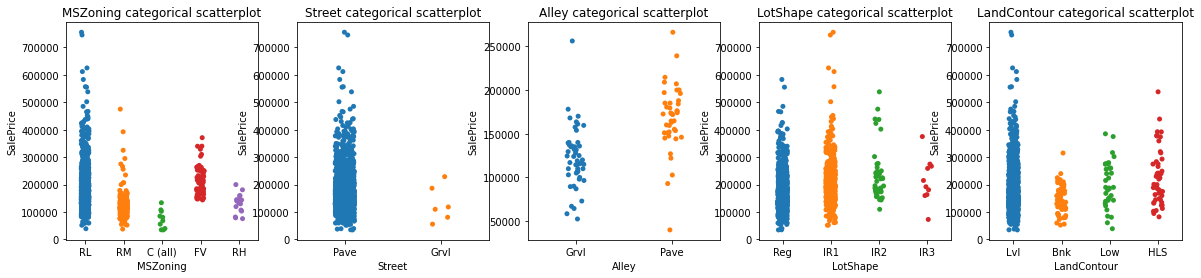

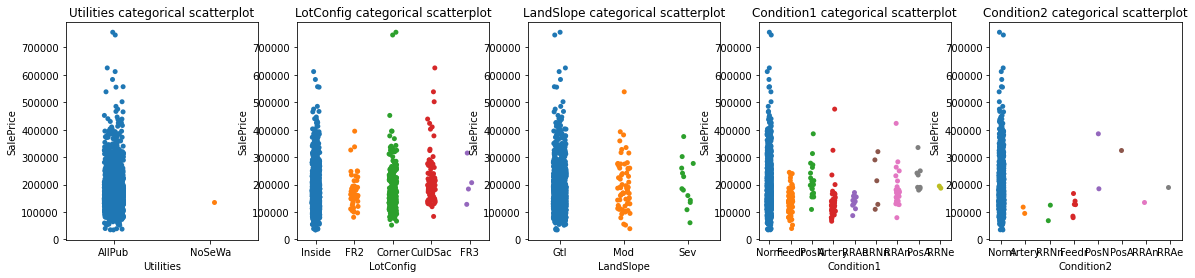

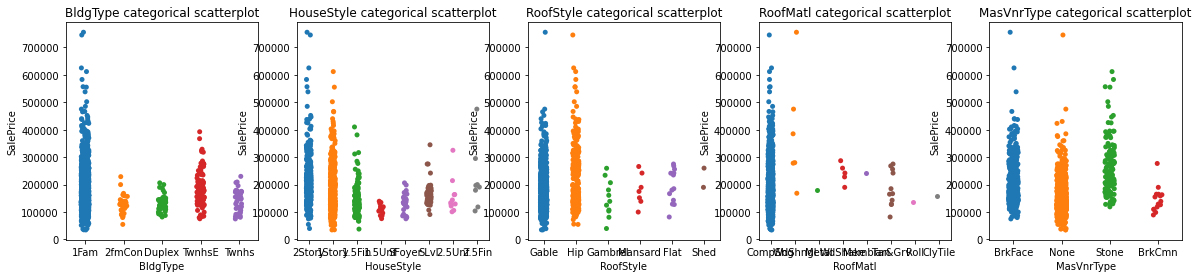

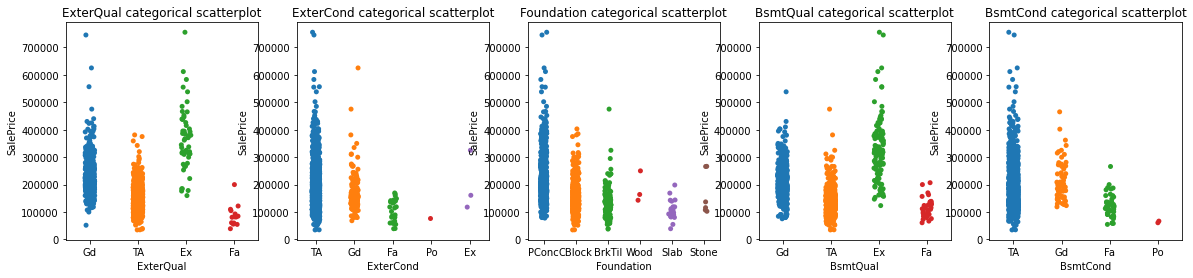

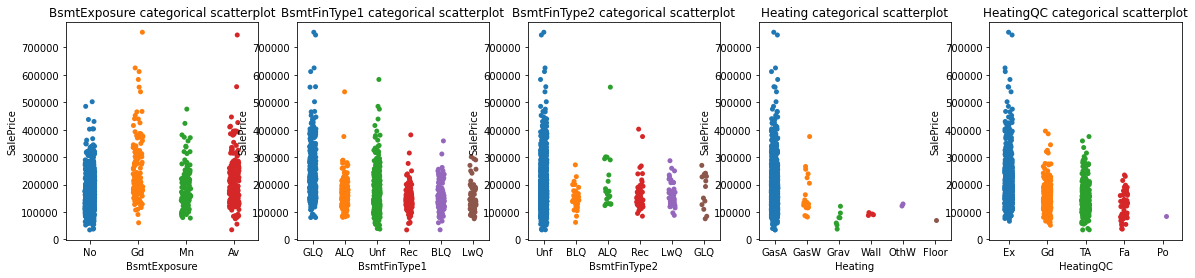

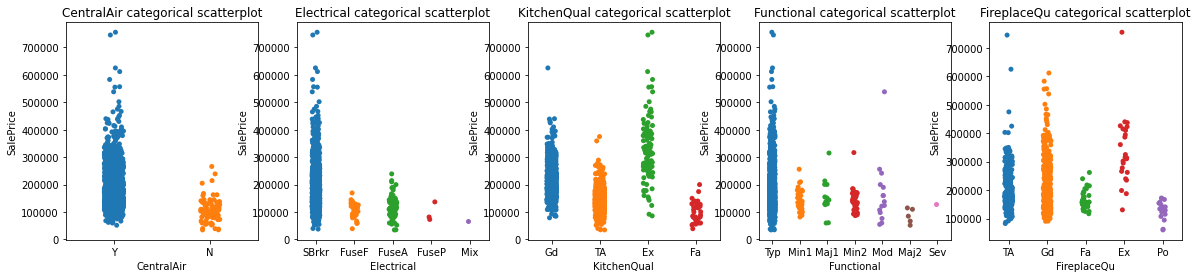

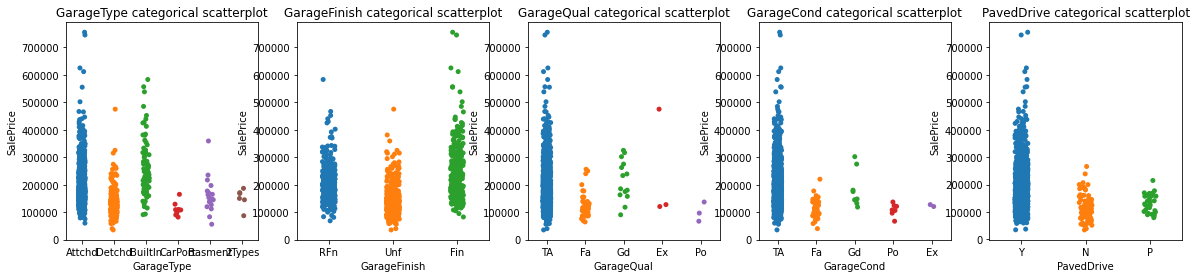

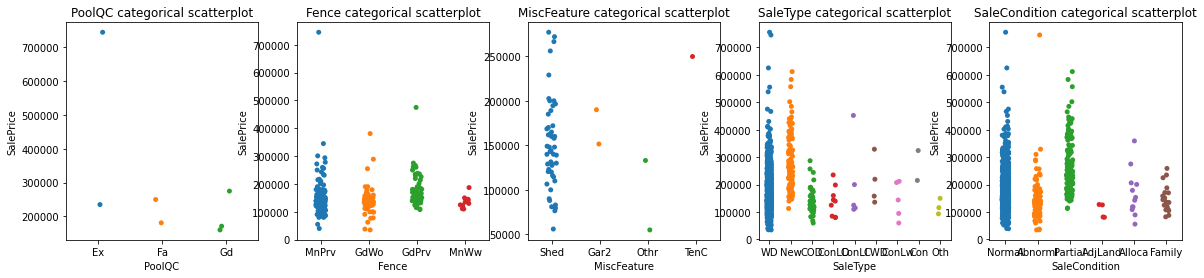

In [23]:
from itertools import zip_longest

# Draw bar plots of all the categorical columns
for sub_categirical_cols in zip_longest(*[iter(low_cardinality_categorical_cols)] * 5, fillvalue=None):
    fig = plt.figure(figsize = (20, 4))
    for index, categirical_col in enumerate(sub_categirical_cols, start=1):
        if categirical_col:
            ax = fig.add_subplot(1, 5, index)
            sns.stripplot(data=train_full, x=categirical_col, y=TARGET, ax=ax)
            ax.set_title(categirical_col + " categorical scatterplot")

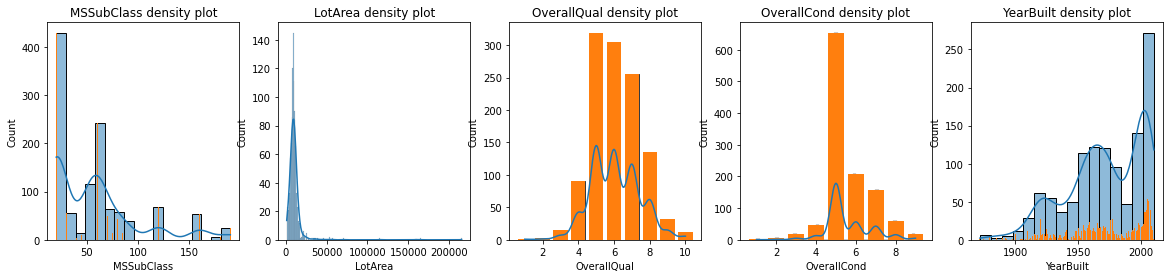

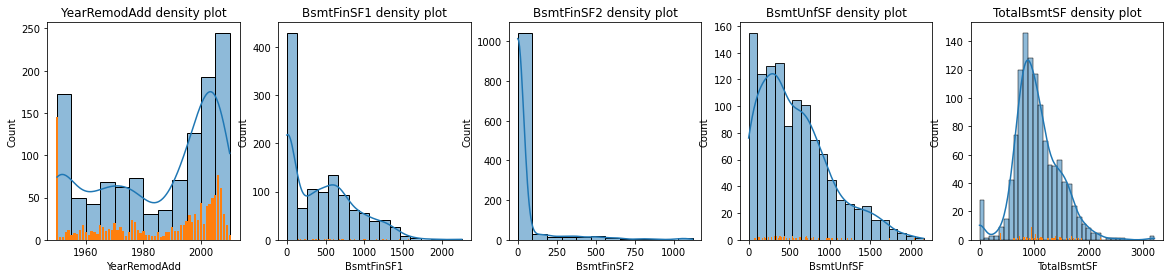

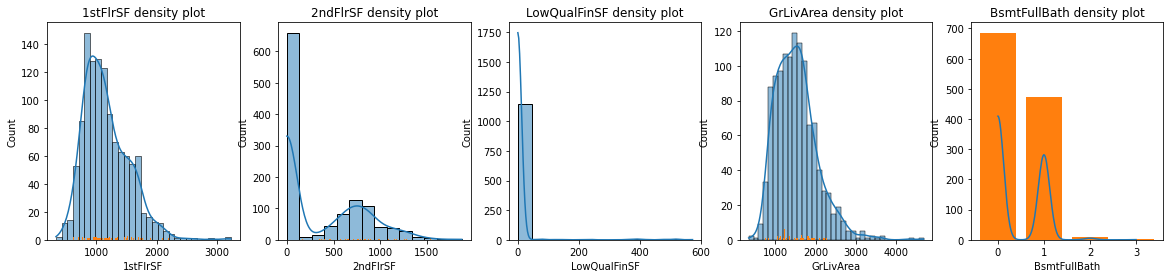

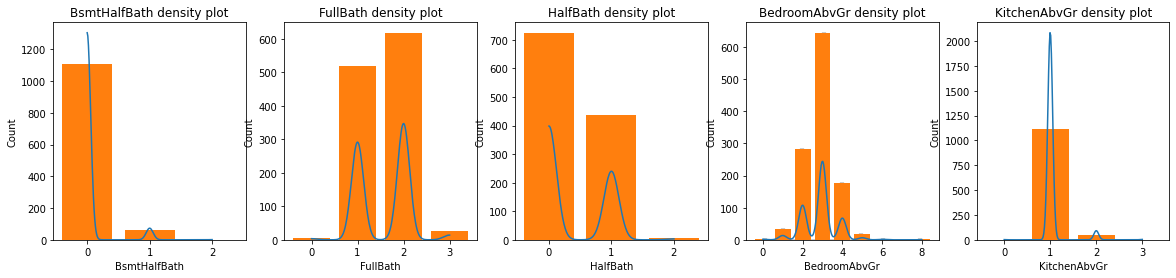

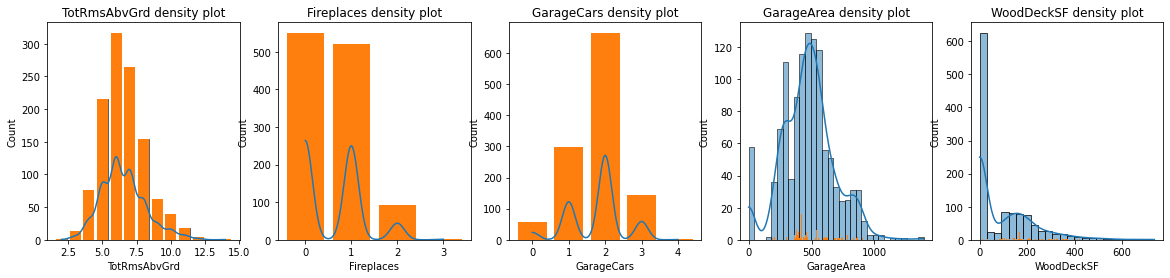

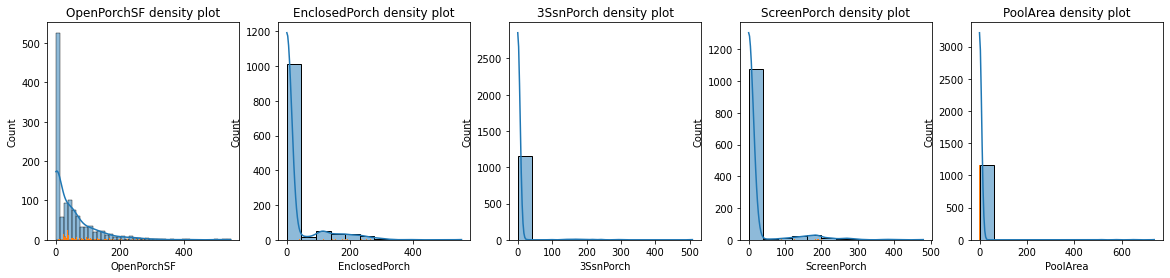

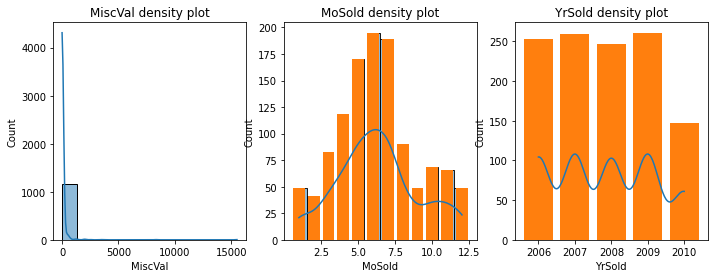

In [24]:
from itertools import zip_longest

# Draw bar plots of all the discrete columns
for sub_discrete_cols in zip_longest(*[iter(discrete_cols)] * 5, fillvalue=None):
    fig = plt.figure(figsize = (20, 4))
    for index, discrete_col in enumerate(sub_discrete_cols, start=1):
        if discrete_col:
            counts = X_train[discrete_col].value_counts()
            ax = fig.add_subplot(1, 5, index)
            sns.histplot(X_train[discrete_col], ax=ax, kde=True)
            ax.bar(counts.index, height=counts.values)
            ax.set_title(discrete_col + " density plot")

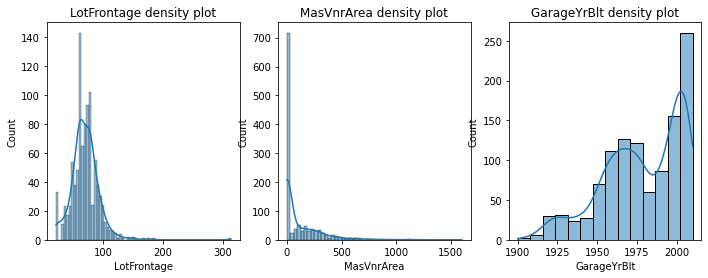

In [25]:
from itertools import zip_longest

# Draw bar plots of all the continuous columns
for sub_continuous_cols in zip_longest(*[iter(continuous_cols)] * 5, fillvalue=None):
    fig = plt.figure(figsize = (20, 4))
    for index, continuous_col in enumerate(sub_continuous_cols, start=1):
        if continuous_col:
            counts = X_train[continuous_col].value_counts()
            ax = fig.add_subplot(1, 5, index)
            sns.histplot(X_train[continuous_col], ax=ax, kde=True)
            ax.set_title(continuous_col + " density plot")

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [27]:
# Preprocessing for continuous data
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler()),
])

In [28]:
# Preprocessing for discrete data
discrete_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler()),
])

In [29]:
# Preprocessing for categorical data
low_cardinality_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

high_cardinality_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('target', LeaveOneOutEncoder()),
])

In [30]:
# Bundle preprocessing for numerical and categorical data
column_transformer = ColumnTransformer(
    transformers=[
       ('con', continuous_transformer, continuous_cols),
       ('dis', discrete_transformer, discrete_cols),
       ('low_cat', low_cardinality_categorical_transformer, low_cardinality_categorical_cols),
       # ('high_cat', high_cardinality_categorical_transformer, high_cardinality_categorical_cols),
    ],
    remainder = "drop"
)

preprocessor = Pipeline([
    ('column_transformer', column_transformer),
    ('pca', PCA())
])

In [31]:
preprocessor.fit(X_train, y=y_train)
X_valid_transformed = preprocessor.transform(X_valid)
X_train_transformed = preprocessor.transform(X_train)

In [32]:
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    early_stopping_rounds=5,
    random_state=RANDOM_STATE,
    objective="reg:squarederror",
    eval_metric="rmse",
)


# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', model)
])

In [33]:
# Fit the model
result = pipeline.fit(
    X_train, y_train,
    # If there’s more than one item in eval_set, the last entry will be used for early stopping.
    xgb__eval_set=[(X_train_transformed, y_train), (X_valid_transformed, y_valid)], xgb__verbose=False
)

In [34]:
# Load evals result by calling the evals_result() function
evals_result = result["xgb"].evals_result()

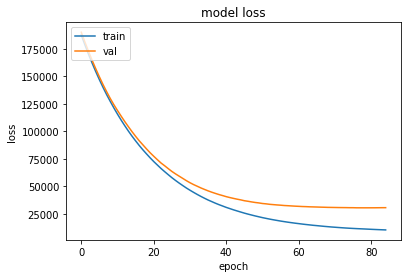

In [35]:
plt.plot(evals_result['validation_0']["rmse"])
plt.plot(evals_result['validation_1']["rmse"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

# Get predictions of training data, 
y_train_preds = pipeline.predict(X_train)

# Evaluate the model on training set
score_on_training_set = mean_squared_error(y_train, y_train_preds, squared=False)
print('RMSE on training set:', score_on_training_set)

# Get predictions of validation data
y_valid_preds = pipeline.predict(X_valid)

# Evaluate the model on validation set
score_on_validation_set = mean_squared_error(y_valid, y_valid_preds, squared=False)
print('RMSE on validation set:', score_on_validation_set)

RMSE on training set: 11038.661323211261
RMSE on validation set: 30421.38740445869


In [37]:
# make predictions which we will submit. 
test_preds = pipeline.predict(test_X)

In [38]:
test_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Run the code to save predictions in the format used for competition scoring
output = pd.DataFrame({'Id': test_X.index, TARGET: test_preds})
output.to_csv('/kaggle/working/submission.csv', index=False)